In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

/Users/ali.septiandri/miniforge3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = SentenceTransformer('sentence-transformers/sentence-t5-xl')

In [3]:
eff_defs = [
    ["Abstract strategy games", "The ability to play abstract games involving sometimes complex strategy and reasoning ability, such as chess, go, or checkers, at a high level"],
    ["Real-time video games", "The ability to play a variety of real-time video games of increasing complexity at a high level."],
    ["Image recognition", "The determination of what objects are present in a still image."],
    ["Visual question answering", "The recognition of events, relationships, and context from a still image."],
    ["Image generation", "The creation of complex images."],
    ["Reading comprehension", "The ability to answer simple reasoning questions based on an understanding of text."],
    ["Language modeling", "The ability to model, predict, or mimic human language."],
    ["Translation", "The translation of words or text from one language into another."],
    ["Speech recognition", "The recognition of spoken language into text."],
    ["Instrumental track recognition", "The recognition of instrumental musical tracks."],
]

In [4]:
print(pd.DataFrame(eff_defs, columns=["AI application", "Definition"]).set_index("AI application").to_latex())

\begin{tabular}{ll}
\toprule
 & Definition \\
AI application &  \\
\midrule
Abstract strategy games & The ability to play abstract games involving sometimes complex strategy and reasoning ability, such as chess, go, or checkers, at a high level \\
Real-time video games & The ability to play a variety of real-time video games of increasing complexity at a high level. \\
Image recognition & The determination of what objects are present in a still image. \\
Visual question answering & The recognition of events, relationships, and context from a still image. \\
Image generation & The creation of complex images. \\
Reading comprehension & The ability to answer simple reasoning questions based on an understanding of text. \\
Language modeling & The ability to model, predict, or mimic human language. \\
Translation & The translation of words or text from one language into another. \\
Speech recognition & The recognition of spoken language into text. \\
Instrumental track recognition & The rec

In [5]:
eff_abilities = [
    "The ability to play abstract games involving sometimes complex strategy and reasoning ability, such as chess, go, or checkers, at a high level",
    "The ability to play a variety of real-time video games of increasing complexity at a high level.",
    "The determination of what objects are present in a still image.",
    "The recognition of events, relationships, and context from a still image.",
    "The creation of complex images.",
    "The ability to answer simple reasoning questions based on an understanding of text.",
    "The ability to model, predict, or mimic human language.",
    "The translation of words or text from one language into another.",
    "The recognition of spoken language into text.",
    "The recognition of instrumental musical tracks.",
]

In [6]:
eff_embeddings = model.encode(eff_abilities)

In [7]:
abilities = pd.read_csv('datasets/db_24_3_text/Abilities.txt', sep='\t')
abilities_activities = pd.read_csv('datasets/db_24_3_text/Abilities to Work Activities.txt', sep='\t')

In [8]:
activity_embeddings = model.encode(abilities_activities['Work Activities Element Name'])

In [9]:
ability_sim = cosine_similarity(eff_embeddings, activity_embeddings)

In [10]:
elements = abilities['Element Name'].unique()
element_embeddings = model.encode(elements)

In [11]:
element_sim = cosine_similarity(eff_embeddings, element_embeddings)

In [12]:
random_idx = np.random.randint(0, abilities_activities.shape[0])
print(abilities_activities.loc[random_idx, 'Work Activities Element Name'])
print(eff_abilities[ability_sim[:,random_idx].argmax()])

Identifying Objects, Actions, and Events
The determination of what objects are present in a still image.


In [13]:
random_idx = np.random.randint(0, len(elements))
print(elements[random_idx])
print(eff_abilities[element_sim[:,random_idx].argmax()])

Deductive Reasoning
The ability to answer simple reasoning questions based on an understanding of text.


In [14]:
abilities_activities['ai_exposure'] = ability_sim.sum(axis=0)

,O*NET-SOC Code,Element ID,Element Name,Scale ID,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,n/a
0,11-1011.00,1.A.1.a.1,Oral Comprehension,IM,4.50,8.0,0.19,4.13,4.87,N,NaN,07/2014,Analyst,NaN
1,11-1011.00,1.A.1.a.1,Oral Comprehension,LV,4.88,8.0,0.13,4.63,5.12,N,N,07/2014,Analyst,0.0
2,11-1011.00,1.A.1.a.2,Written Comprehension,IM,4.25,8.0,0.16,3.93,4.57,N,NaN,07/2014,Analyst,NaN
3,11-1011.00,1.A.1.a.2,Written Comprehension,LV,4.62,8.0,0.18,4.27,4.98,N,N,07/2014,Analyst,0.0
4,11-1011.00,1.A.1.a.3,Oral Expression,IM,4.38,8.0,0.18,4.02,4.73,N,NaN,07/2014,Analyst,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100667,53-7121.00,1.A.4.b.3,Sound Localization,LV,2.00,8.0,0.00,2.00,2.00,N,N,08/2019,Analyst,0.0
100668,53-7121.00,1.A.4.b.4,Speech Recognition,IM,3.12,8.0,0.13,2.88,3.37,N,NaN,08/2019,Analyst,NaN
100669,53-7121.00,1.A.4.b.4,Speech Recognition,LV,2.75,8.0,0.16,2.43,3.07,N,N,08/2019,Analyst,0.0
100670,53-7121.00,1.A.4.b.5,Speech Clarity,IM,3.12,8.0,0.13,2.88,3.37,N,NaN,08/2019,Analyst,NaN


In [17]:
abilities['n/a'] = abilities['Not Relevant'].map({'Y': 1, 'N': 0})
abilities_ = abilities.pivot_table(
    index=['O*NET-SOC Code', 'Element ID', 'Element Name'],
    columns=['Scale ID'],
    values=['Data Value', 'n/a'],
    aggfunc='max'
).reset_index()
abilities_.columns = ['O*NET-SOC Code', 'element_id', 'element_name', 'importance', 'level', 'is_not_relevant']
# abilities_ = abilities_.query('is_not_relevant == 0')

In [19]:
abilities_ai = pd.merge(
    abilities_,
    # abilities_activities.groupby('Abilities Element ID').ai_exposure.mean().reset_index(),
    pd.DataFrame({
        'Element Name': elements,
        'ai_exposure': element_sim.sum(axis=0)
    }),
    how='left',
    left_on='element_name',
    right_on='Element Name',
    validate='m:1',
)

abilities_ai['numerator'] = abilities_ai['importance'] * abilities_ai['level'] * abilities_ai['ai_exposure']
abilities_ai['denominator'] = abilities_ai['importance'] * abilities_ai['level']

abilities_ai = abilities_ai.groupby(['O*NET-SOC Code']).agg({
    'numerator': 'sum',
    'denominator': 'sum'
})
abilities_ai['aioe'] = abilities_ai['numerator'] / abilities_ai['denominator']

In [20]:
abilities['Element Name'].unique()[35]

'Stamina'

In [21]:
element_sim.sum(axis=0).argmin()

39

In [25]:
abilities_ai = abilities_ai.reset_index()[['O*NET-SOC Code', 'aioe']]
# abilities_ai.to_csv('datasets/replicated_aioe.csv', index=False)

In [34]:
abilities_ai['SOC Code'] = abilities_ai['O*NET-SOC Code'].str[:7]
aioe_a = abilities_ai.groupby('SOC Code').agg({'aioe': 'mean'}).reset_index()

In [27]:
aioe = pd.read_excel('datasets/AIOE_DataAppendix.xlsx', sheet_name='Appendix A')

In [35]:
aioe_replicated = pd.merge(
    aioe_a,
    aioe,
    how='left',
    on='SOC Code',
)

In [37]:
table = aioe_replicated[['aioe', 'AIOE']]

In [38]:
data = aioe_replicated.dropna()

In [39]:
from scipy.stats import spearmanr, pearsonr

rho, pval = pearsonr(data['AIOE'], data['aioe'])

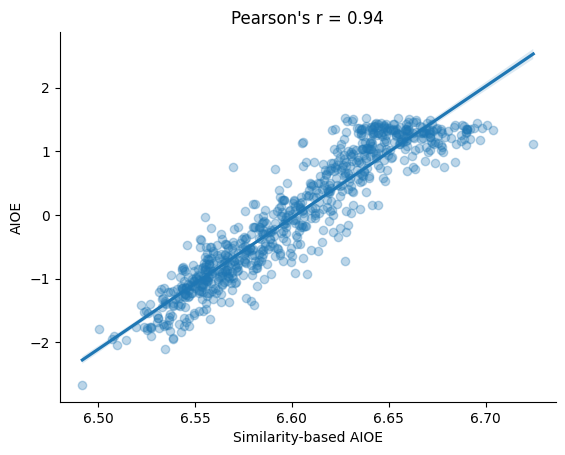

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sns.regplot(
    x='aioe',
    y='AIOE',
    data=data,
    scatter_kws=dict(
        marker='.',
        alpha=.3,
    )
)
plt.title(f"Pearson's r = {rho:.2f}")
plt.xlabel('Similarity-based AIOE')
plt.ylabel('AIOE')
sns.despine()
plt.savefig('figures/aioe.pdf', bbox_inches='tight')